In [12]:
import geomstats.backend as gs
import geomstats.tests
from geomstats.geometry.hypersphere import Hypersphere, HypersphereMetric
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.learning.frechet_mean import FrechetMean
import matplotlib.pyplot as plt
import geomstats.visualization as visualization


In [5]:
from riemannian_mean_shift import RiemannianMeanShift as riemannian_mean_shift

In [6]:
gs.random.seed(10)

In [18]:
sphere = Hypersphere(dim=2)
metric = HypersphereMetric(2)

cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=200)

print("\n")
print(type(cluster))
print(cluster.shape)



<class 'numpy.ndarray'>
(200, 3)




(400, 3)


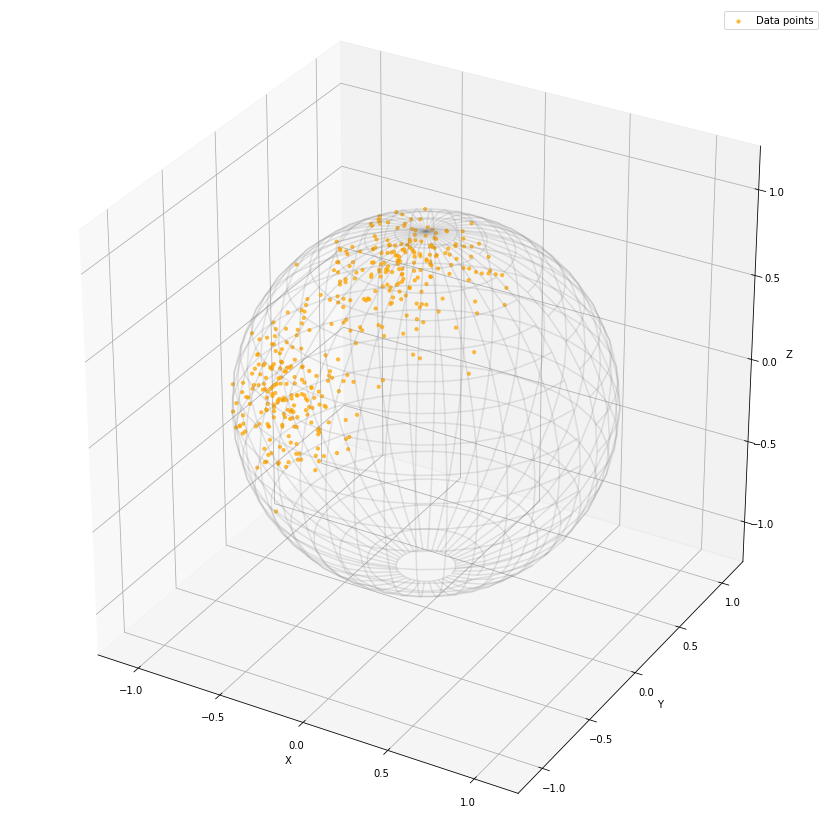

In [25]:
special_orthogonal = SpecialOrthogonal(3)
rotation1 = special_orthogonal.random_uniform()
rotation2 = special_orthogonal.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2

combined_cluster = gs.concatenate((cluster_1, cluster_2))

print("\n")
print(combined_cluster.shape)

fig = plt.figure(figsize=(15, 15))
ax = visualization.plot(combined_cluster, space='S2', color='orange', alpha=0.7, s=10, label='Data points')
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()

[[-0.5964958   0.74162557  0.30689457]
 [-0.95075353  0.16552007 -0.26205121]]


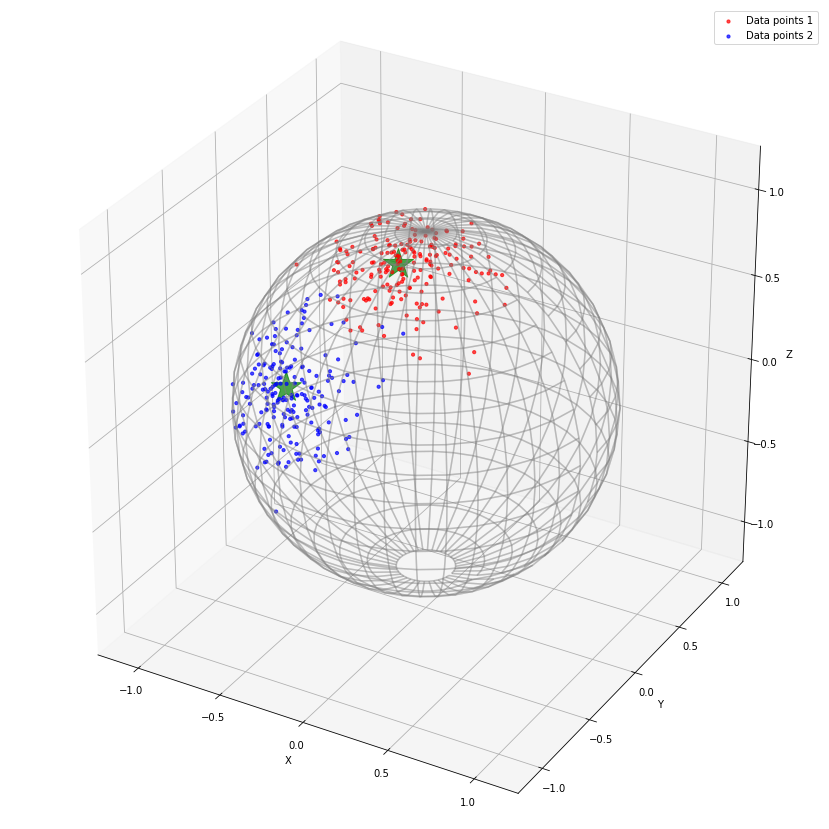

In [26]:
rms = riemannian_mean_shift(
    manifold=sphere,
    metric=metric,
    bandwidth=0.6,
    tol=1e-4,
    n_centers=2,
    init_centers="from_points"
)
rms.fit(combined_cluster)
print(rms.centers)

fig = plt.figure(figsize=(15, 15))
ax = visualization.plot(cluster_1, space='S2', color='red', alpha=0.7, s=10, label='Data points 1')
ax = visualization.plot(cluster_2, space='S2', ax=ax, color='blue', alpha=0.7, s=10, label='Data points 2')
ax = visualization.plot(rms.centers, space='S2', ax=ax, color='green', alpha=0.7, marker='*', s=1000)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()